# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Criação do DataFrame
df = pd.read_csv('./previsao_de_renda.csv')
df.head()


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [4]:
# Matriz de Correlação entre as variáveis quantitativas do DataFrame
var_qtt = df[["qtd_filhos","idade","tempo_emprego","qt_pessoas_residencia","renda"]]
var_qtt.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


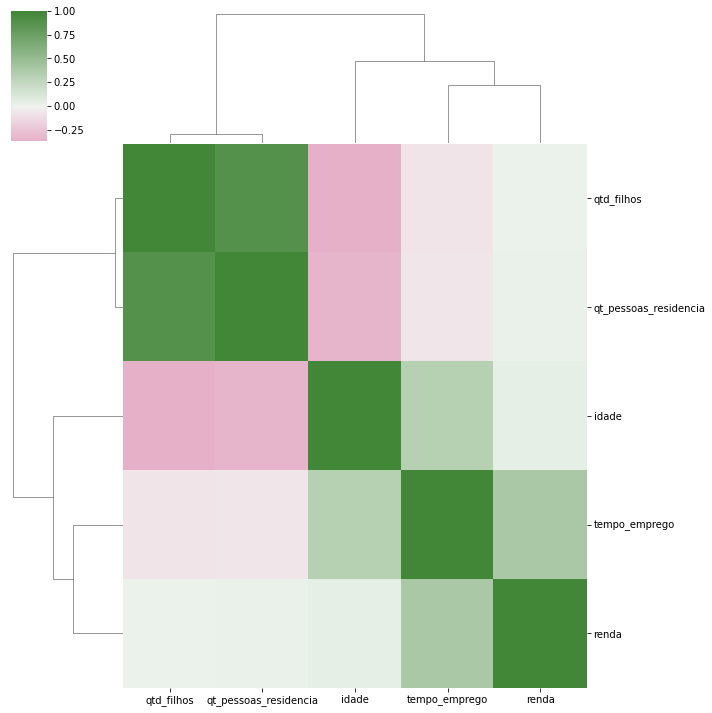

In [5]:
cmap = sns.diverging_palette(h_neg=350, h_pos=125, as_cmap=True, sep = 1, center = 'light') # criando configurações do cluster map
sns.clustermap(var_qtt.corr(), figsize=(10, 10), center = 0, cmap=cmap) # criando o cluster map

#### > Nota-se uma correlação bem positiva entre as variáveis "qtd_filhos" e "qt_pessoas_residencia", o que faz muito sentido já que em muitos casos os filhos ainda moram com os pais.
#### > Correlação ligeiramente negativa entre a "idade" com "qtd_filhos" e "qt_pessoas_residencia", que também faz sentido, pois com o passar do tempo os filhos buscam deixar a casa dos pais.
#### > E correlação ligeiramente positiva entre "idade" e "tempo_emprego", que não é uma regra, porém grande parte das pessoas mais velhas possuem um local de emprego em que criam uma carreira e quanto mais velho diminui a chance de trocar de empresa.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='idade', ylabel='renda'>

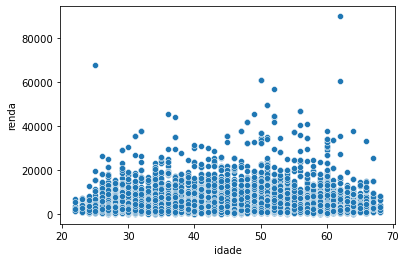

In [6]:
sns.scatterplot(x="idade",y="renda", data = var_qtt) #Gráfico de dispersão idade x renda

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

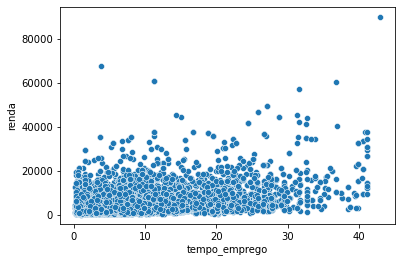

In [7]:
sns.scatterplot(x="tempo_emprego",y="renda", data = var_qtt) #Gráfico de dispersão tempo_emprego x renda

<AxesSubplot:xlabel='idade', ylabel='tempo_emprego'>

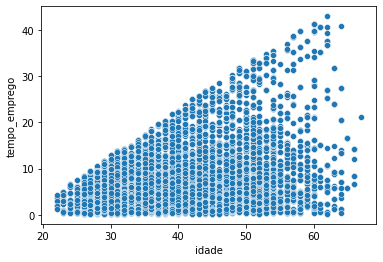

In [8]:
sns.scatterplot(x="idade",y="tempo_emprego", data = var_qtt) #Gráfico de dispersão idade x tempo_emprego

#### Vemos que as duas variáveis são diretamente proprorcionais, o tempo de emprego é diretamente proporcional com a idade, mas que separadamente não se nota uma correlação utilizando o mapa de dispersão.

3) Na sua opinião, há outliers na variável renda?

#### Como observamos nos gráficos acima, quando analisadas por gráfico de dispersão, as variáveis que tem maiores correlação com renda, possuem outliers, que impede uma visualização de correlação mais explicita

4) Calcule o logaritmo da variável renda e repita a sequência de análise

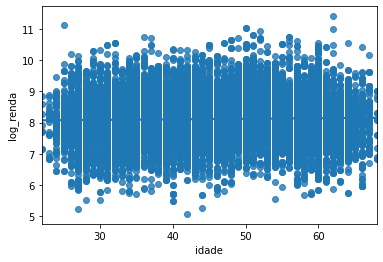

In [9]:
renda_log = var_qtt.copy()
renda_log['log_renda'] = np.log(renda_log['renda']) # Tratando os outliers da variável "venda" calculando o logaritmo da variável
_ = sns.regplot(x='idade', y='log_renda', data = renda_log)



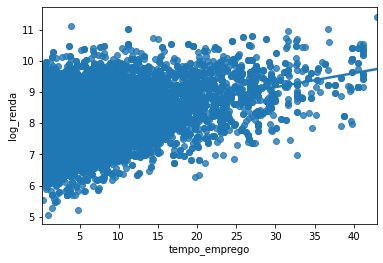

In [10]:
_ = sns.regplot(x='tempo_emprego', y='log_renda', data = renda_log) #Visualizando o tempo de emprego com a renda diminuindo os outliers

In [11]:
renda_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

#### A aplicação do log, diminuiu consideravelmente os outliers dando uma visão melhor de correlação:
#### > A idade tem pouca correlação com a renda, nota-se na linha de tendencia com quase nenhuma amplitude.
#### > Já o tempo de emprego tem uma pequena correlação positiva com a renda, como vemos no gráfico e matriz. O que faz sentido já que geralmente o salário de uma pessoa de muito tempo de empresa tende a subir também com o tempo.